# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [3]:
#Check to see if there is any null data. If there is it needs to be cleaned
pyber_data_df.isnull().sum() 

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

In [4]:
#check to see dataframe types
#pyber_data_df.info()
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [5]:
#check the unique values in the city and type objects to understand data better

# print(f'City: {pyber_data_df['city'].unique()}')

cities = pyber_data_df['city'].unique()
print(f'Cities: {cities}')

types = pyber_data_df['type'].unique()
print(f'Types: {types}')


Cities: ['Lake Jonathanshire' 'South Michelleport' 'Port Samanthamouth'
 'Rodneyfort' 'South Jack' 'South Latoya' 'New Paulville' 'Simpsonburgh'
 'South Karenland' 'North Jasmine' 'New Kimberlyborough' 'West Angela'
 'Roberthaven' 'North Jason' 'Williamsview' 'Leahton' 'West Anthony'
 'New Paulton' 'West Patrickchester' 'Deanville' 'West Josephberg'
 'West Samuelburgh' 'West Heidi' 'Loganberg' 'Huntermouth' 'Grahamburgh'
 'Port Frank' 'East Kaylahaven' 'West Robert' 'North Markport'
 'Richardfort' 'Reynoldsfurt' 'Justinberg' 'Martinezhaven' 'Jerryton'
 'Lake Scottton' 'South Evanton' 'Rogerston' 'West Ericstad' 'Hurleymouth'
 'Joneschester' 'Port Angela' 'Barajasview' 'West Christopherberg'
 'New Jacobville' 'Port David' 'Valentineton' 'Carriemouth' 'Williamsstad'
 'Royland' 'Karenberg' 'Christopherfurt' 'Liumouth' 'Johnton' 'Erikaland'
 'Raymondhaven' 'Karenside' 'Lake Danielberg' 'South Phillip'
 'North Madeline' 'Port Johnbury' 'Robertport' 'Pattyland' 'Amandaburgh'
 'North Barbara'

In [6]:
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


## Deliverable 1: Get a Summary DataFrame 

In [7]:
#  1. Get the total rides for each city type

# suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
# rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]


# # Get the number of rides for count by cities.
# urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]


# print(f'suburban_cities_df: {suburban_cities_df}')
# print(f'rural_cities_df: {rural_cities_df}')

ctype_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ctype_ride_count


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
# 2. Get the total drivers for each city type
ctype_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
ctype_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [9]:
#  3. Get the total amount of fares for each city type
ctype_fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
ctype_fare_total


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
#  4. Get the average fare per ride for each city type. 

# another method of getting this 
# ctype_fare_avg = pyber_data_df.groupby(["type"]).mean()["fare"]
# ctype_fare_avg

ctype_fare_avg =  ctype_fare_total/ctype_ride_count
ctype_fare_avg


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [11]:
# 5. Get the average fare per driver for each city type. 

ctype_fare_avg_driver = ctype_fare_total/ctype_driver_count

ctype_fare_avg_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
#  6. Create a PyBer summary DataFrame. 


pyber_summary_df = pd.DataFrame()



pyber_summary_df["Total Rides"] = ctype_ride_count
pyber_summary_df["Total Drivers"] = ctype_driver_count
pyber_summary_df["Total Fares"] = ctype_fare_total
pyber_summary_df["Average Fare per Ride"] = ctype_fare_avg
pyber_summary_df["Average Fare per Driver"] = ctype_fare_avg_driver

                                
pyber_summary_df
                                

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [14]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)


pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# 1. Read the merged DataFrame

pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [16]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fares_group_cities_df = pyber_data_df.groupby(["type","date"]).sum().fare.to_frame()
fares_group_cities_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [17]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

fares_group_cities_df = fares_group_cities_df.reset_index()
fares_group_cities_df.head()


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [19]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fares_group_cities_df_pivot = fares_group_cities_df.pivot(index="date", columns ='type', values='fare')

fares_group_cities_df_pivot.head()


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fare_given_dates_df = fares_group_cities_df_pivot.loc['2019-01-01':'2019-04-29']
fare_given_dates_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [22]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_given_dates_df.index = pd.to_datetime(fare_given_dates_df.index)

fare_given_dates_df.head()



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [23]:
# 7. Check that the datatype for the index is datetime using df.info()

fare_given_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [24]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fare_given_dates_week_df = fare_given_dates_df.resample('W').sum()

fare_given_dates_week_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


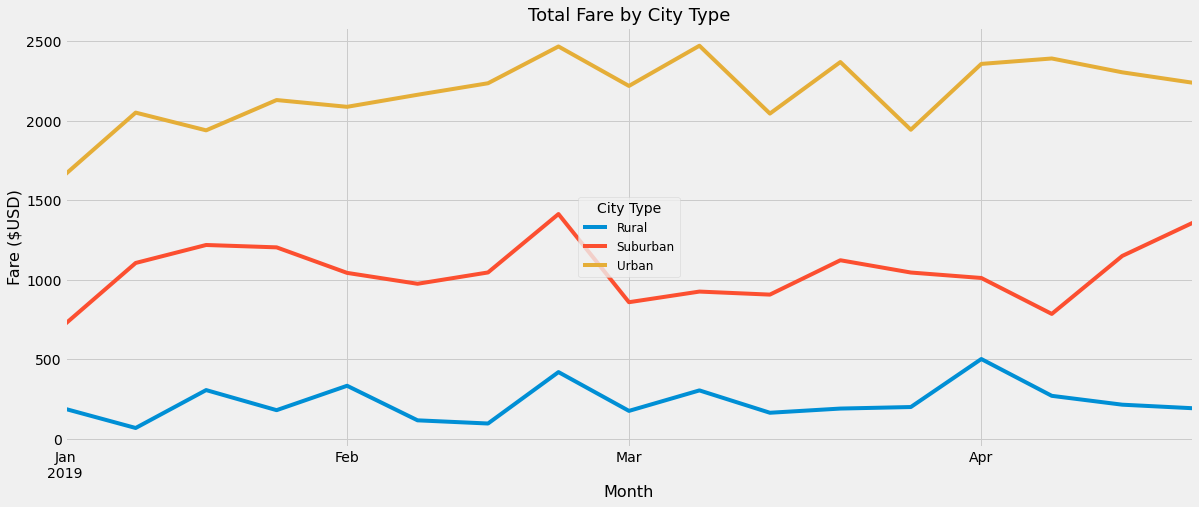

<Figure size 432x288 with 0 Axes>

In [35]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Adjust size of image and pass data for graph 
fare_given_dates_week_df.plot(figsize=(18, 8))
plt.gcf().subplots_adjust(bottom=0.15)

# Add graph labels
plt.xlabel('Month', fontsize=16)
plt.ylabel('Fare ($USD)', fontsize=16)
plt.title('Total Fare by City Type', fontsize=18)

# Adjust legend formating
legnd = plt.legend(fontsize="12", loc="best", title="City Type")
legnd.get_title().set_fontsize(14)


# Show figure
plt.show()


# Save figure
plt.savefig('Resources/Pyber_fare_summary.png');

